In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# скопируем датасеты с Google диска в Colab
!cp '/content/drive/My Drive/Сахалин_Родник/Учебное_пособие_Классификация_изображений/Датасеты/Береза.zip' Береза.zip
!cp '/content/drive/My Drive/Сахалин_Родник/Учебное_пособие_Классификация_изображений/Датасеты/Подорожник.zip' Подорожник.zip

Проверим, что выбранные файлы загрузились в Colaboratory при помощи команды ls (рис. 7)

In [ ]:
!ls

drive  sample_data  Береза.zip	Подорожник.zip


##Подготовка исходных изображений

Распакуем загруженные архивы с данными с помощью команды unzip.

In [ ]:
# распаковка архива
!unzip Береза.zip
!unzip Подорожник.zip

Archive:  Береза.zip
  inflating: Береза/Береза_1.jpg  
  inflating: Береза/Береза_10.jpg  
  inflating: Береза/Береза_11.jpg  
  inflating: Береза/Береза_12.jpg  
  inflating: Береза/Береза_13.jpg  
  inflating: Береза/Береза_14.jpg  
  inflating: Береза/Береза_15.jpg  
  inflating: Береза/Береза_2.jpg  
  inflating: Береза/Береза_3.jpg  
  inflating: Береза/Береза_4.jpg  
  inflating: Береза/Береза_5.jpg  
  inflating: Береза/Береза_6.jpg  
  inflating: Береза/Береза_7.jpg  
  inflating: Береза/Береза_8.jpg  
  inflating: Береза/Береза_9.jpg  
Archive:  Подорожник.zip
  inflating: Подорожник/Подорожник_1.jpg  
  inflating: Подорожник/Подорожник_10.jpg  
  inflating: Подорожник/Подорожник_11.jpg  
  inflating: Подорожник/Подорожник_12.jpg  
  inflating: Подорожник/Подорожник_13.jpg  
  inflating: Подорожник/Подорожник_14.jpg  
  inflating: Подорожник/Подорожник_15.jpg  
  inflating: Подорожник/Подорожник_2.jpg  
  inflating: Подорожник/Подорожник_3.jpg  
  inflating: Подорожник/Подоро

Запишем список извлеченных файлов из архивов "Береза" и "Подорожник" в переменные Birch и Goose_grass, соответственно, для их последующего использования. Для этого используем модуль os и метод listdir.

In [ ]:
# запишем список файлов  директорий в соответствующие переменные
import os
Birch = os.listdir('/content/Береза')
Goose_grass = os.listdir('/content/Подорожник')

Чтобы посмотреть на созданный список, использем оператор print.

In [ ]:
print(Birch)
print(Goose_grass)

['Береза_13.jpg', 'Береза_11.jpg', 'Береза_10.jpg', 'Береза_9.jpg', 'Береза_15.jpg', 'Береза_8.jpg', 'Береза_12.jpg', 'Береза_6.jpg', 'Береза_2.jpg', 'Береза_5.jpg', 'Береза_1.jpg', 'Береза_7.jpg', 'Береза_4.jpg', 'Береза_14.jpg', 'Береза_3.jpg']
['Подорожник_2.jpg', 'Подорожник_7.jpg', 'Подорожник_12.jpg', 'Подорожник_5.jpg', 'Подорожник_13.jpg', 'Подорожник_14.jpg', 'Подорожник_15.jpg', 'Подорожник_3.jpg', 'Подорожник_4.jpg', 'Подорожник_11.jpg', 'Подорожник_9.jpg', 'Подорожник_8.jpg', 'Подорожник_1.jpg', 'Подорожник_10.jpg', 'Подорожник_6.jpg']


Создадим директорию "Data", в которую будем сохранять аугментированные данные. Для этого используем команду mkdir.

In [ ]:
!mkdir Data

Убедимся, что директория "Data" создана, для этого используем команду ls (рис. 8).



In [ ]:
!ls

Data  drive  sample_data  Береза  Береза.zip  Подорожник  Подорожник.zip


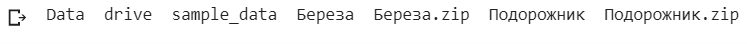

Рис. 8. Объекты в Colaboratory - директории Data, Береза, Подорожник и zip файлы.

##Генерация новых изображений

In [ ]:
from keras.preprocessing.image import img_to_array
# функция для генерации изображений
def generating_pictures(img, prefix):
  x = img_to_array(img)  # это массив Numpy с формой (канал цвета, высота, ширина)
  x = x.reshape((1,) + x.shape)  # изменение формы массива (количество изображений, канал цвета, высота, ширина)
  i = 0 # счетчик изображений
  for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/Data/', save_prefix = prefix, save_format='jpeg'):
      i += 1
      if i > 20:
          break  # выход из цикла при i > 20

Создадим путь к файлам датасета "Береза":

In [ ]:
# Birch
path_Birch = []
for name in Birch:
  path='/content/Береза/' + name
  path_Birch.append(path)

Создадим путь к файлам датасета "Подорожник":

In [ ]:
# Goose_grass
path_Goose_grass = []
for name in Goose_grass:
  path='/content/Подорожник/' + name
  path_Goose_grass.append(path)

Посмотрим на результат (рис. 9, 10).

In [ ]:
path_Birch

['/content/Береза/Береза_13.jpg',
 '/content/Береза/Береза_11.jpg',
 '/content/Береза/Береза_10.jpg',
 '/content/Береза/Береза_9.jpg',
 '/content/Береза/Береза_15.jpg',
 '/content/Береза/Береза_8.jpg',
 '/content/Береза/Береза_12.jpg',
 '/content/Береза/Береза_6.jpg',
 '/content/Береза/Береза_2.jpg',
 '/content/Береза/Береза_5.jpg',
 '/content/Береза/Береза_1.jpg',
 '/content/Береза/Береза_7.jpg',
 '/content/Береза/Береза_4.jpg',
 '/content/Береза/Береза_14.jpg',
 '/content/Береза/Береза_3.jpg']

In [ ]:
path_Goose_grass

['/content/Подорожник/Подорожник_2.jpg',
 '/content/Подорожник/Подорожник_7.jpg',
 '/content/Подорожник/Подорожник_12.jpg',
 '/content/Подорожник/Подорожник_5.jpg',
 '/content/Подорожник/Подорожник_13.jpg',
 '/content/Подорожник/Подорожник_14.jpg',
 '/content/Подорожник/Подорожник_15.jpg',
 '/content/Подорожник/Подорожник_3.jpg',
 '/content/Подорожник/Подорожник_4.jpg',
 '/content/Подорожник/Подорожник_11.jpg',
 '/content/Подорожник/Подорожник_9.jpg',
 '/content/Подорожник/Подорожник_8.jpg',
 '/content/Подорожник/Подорожник_1.jpg',
 '/content/Подорожник/Подорожник_10.jpg',
 '/content/Подорожник/Подорожник_6.jpg']

Рис. 10. Путь к файлам датасета "Подорожник".

Создадим префиксы для сгенерированных файлов - 'Birch' и 'Goose_grass', соответственно для файлов с изображением листьев березы и листьев подорожника.

In [ ]:
# создание префикса для новых файлов
prefix_Birch = 'Birch'
prefix_Goose_grass = 'Goose_grass'

Создадим словарь Python для каждого класса изображений с аргументами для функции generating_pictures, используя метод fromkeys. В словаре для каждого класса ключ - путь к имени файла - это аргумент img, значение - соответствующий префикс для нового файла - это аргумент prefix.

In [ ]:
# создание словаря с аргументами для функции generating_pictures
dict_Birch = dict.fromkeys(path_Birch, prefix_Birch)
dict_Goose_grass = dict.fromkeys(path_Goose_grass, prefix_Goose_grass)

Далее в цикле присвоим аргументам img и prefix ключ и значение из соответствующего словаря и вызовем функцию для генерации новых изображений. Для загрузки изображений используем функцию load_img.

In [ ]:
from keras.preprocessing.image import load_img
# определение аргументов для файлов Birch
for key, value in dict_Birch.items():
  img = load_img(key)  # путь к имени файла
  prefix = value # префикс для нового файла
  # вызов функции
  generating_pictures(img, prefix)

In [ ]:
# определение аргументов для файлов Goose_grass
for key, value in dict_Goose_grass.items():
  img = load_img(key)  # путь к имени файла
  prefix = value # префикс для нового файла
  # вызов функции
  generating_pictures(img, prefix)

Посмотрим на список файлов в директории Data и подсчитаем их количество при помощи команды find.

In [ ]:
# look at the contents of the directory
print(os.listdir('/content/Data'))

['Goose_grass_0_9297.jpeg', 'Birch_0_7594.jpeg', 'Birch_0_5785.jpeg', 'Birch_0_5529.jpeg', 'Goose_grass_0_9042.jpeg', 'Goose_grass_0_6705.jpeg', 'Goose_grass_0_6611.jpeg', 'Goose_grass_0_2489.jpeg', 'Goose_grass_0_3136.jpeg', 'Birch_0_3312.jpeg', 'Birch_0_8147.jpeg', 'Birch_0_5122.jpeg', 'Birch_0_5777.jpeg', 'Birch_0_504.jpeg', 'Goose_grass_0_7286.jpeg', 'Birch_0_8697.jpeg', 'Goose_grass_0_8582.jpeg', 'Goose_grass_0_210.jpeg', 'Goose_grass_0_6933.jpeg', 'Birch_0_8643.jpeg', 'Birch_0_416.jpeg', 'Goose_grass_0_2638.jpeg', 'Birch_0_1673.jpeg', 'Goose_grass_0_9694.jpeg', 'Birch_0_1847.jpeg', 'Birch_0_5482.jpeg', 'Birch_0_3841.jpeg', 'Goose_grass_0_5440.jpeg', 'Goose_grass_0_8581.jpeg', 'Birch_0_654.jpeg', 'Goose_grass_0_286.jpeg', 'Goose_grass_0_2840.jpeg', 'Goose_grass_0_4830.jpeg', 'Birch_0_8792.jpeg', 'Birch_0_7275.jpeg', 'Goose_grass_0_8493.jpeg', 'Birch_0_8571.jpeg', 'Birch_0_1150.jpeg', 'Birch_0_9008.jpeg', 'Birch_0_9893.jpeg', 'Birch_0_1855.jpeg', 'Birch_0_8326.jpeg', 'Birch_0_1067.

In [ ]:
# подсчет файлов в директории
!find /content/Data -type f| wc -l

619


Итак, мы создали новый датасет  путем трансформации исходных изображений.

##Просмотр новых изображений

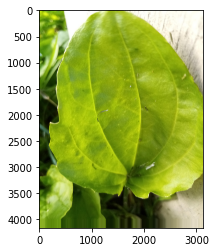

In [ ]:
# загрузим необходимые ресурсы
import matplotlib.pyplot as plt
import random
# поместим список новых файлов в переменную filenames
filenames = os.listdir('/content/Data')
# выберем случайный файл
sample = random.choice(filenames)
image = load_img("/content/Data/" + sample)
# посмотрим на изображение
plt.imshow(image)

Рис. 12. Сгенерированные изображения листьев березы.

На рисунке 11 вы можете видеть результат трансформации за счет параметра horizontal_flip - изображения перевернуты по горизонтали.

##Упаковка архива с новыми данными

Упакуем директорию Data с новыми файлами в архив zip с именем archive_aug_Data.

In [ ]:
# создание архива zip (сжатие от 1 до 9)
!zip -r -9 archive_aug_Data /content/Data/*

  adding: content/Data/Birch_0_1014.jpeg (deflated 1%)
  adding: content/Data/Birch_0_1067.jpeg (deflated 1%)
  adding: content/Data/Birch_0_1082.jpeg (deflated 5%)
  adding: content/Data/Birch_0_1084.jpeg (deflated 2%)
  adding: content/Data/Birch_0_1092.jpeg (deflated 5%)
  adding: content/Data/Birch_0_1111.jpeg (deflated 3%)
  adding: content/Data/Birch_0_1146.jpeg (deflated 4%)
  adding: content/Data/Birch_0_1150.jpeg (deflated 1%)
  adding: content/Data/Birch_0_1187.jpeg (deflated 1%)
  adding: content/Data/Birch_0_1259.jpeg (deflated 2%)
  adding: content/Data/Birch_0_1278.jpeg (deflated 0%)
  adding: content/Data/Birch_0_1291.jpeg (deflated 2%)
  adding: content/Data/Birch_0_130.jpeg (deflated 5%)
  adding: content/Data/Birch_0_1352.jpeg (deflated 2%)
  adding: content/Data/Birch_0_1361.jpeg (deflated 3%)
  adding: content/Data/Birch_0_1362.jpeg (deflated 1%)
  adding: content/Data/Birch_0_1420.jpeg (deflated 2%)
  adding: content/Data/Birch_0_1438.jpeg (deflated 2%)
  adding: c

Посмотрим на объекты в Colaboratory с помощью команды ls. Среди них есть созданный нами архив archive_aug_Data.zip (рис. 13).

In [ ]:
!ls

archive_aug_Data.zip  drive	   Береза      Подорожник
Data		      sample_data  Береза.zip  Подорожник.zip


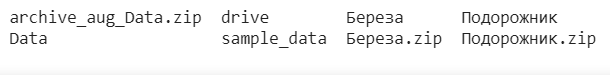

Рис. 13. Объекты Colaboratory.

Скопируем архив archive_aug_Data.zip на свой Google-диск, чтобы использовать его для обучения нейронной сети. Вначале указываем путь размещения архива в Colaboratory, затем - путь для размещения архива на Google-диске.

In [ ]:
# копируем архив archive_aug_Data.zip на  Google-диск
!cp '/content/archive_aug_Data.zip' '/content/drive/My Drive/Сахалин_Родник/Учебное_пособие_Классификация_изображений/Датасеты'

Перейдите на свой Google-диск и убедитесь, что архив перемещен по указанному вами пути (рис. 14).

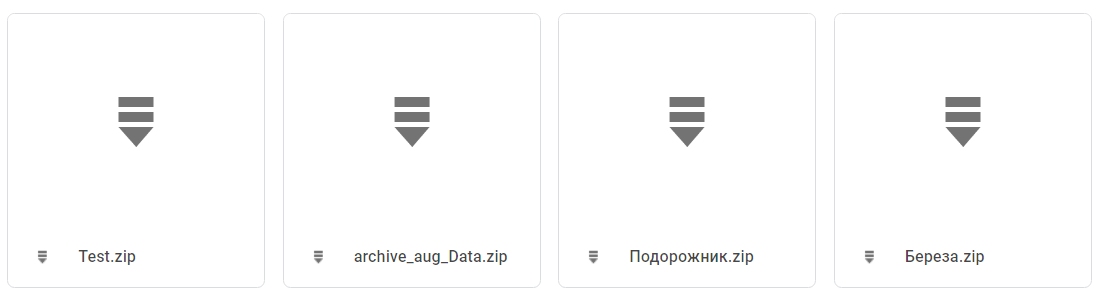

Рис. 14. Созданный архив archive_aug_Data.zip на Google-диске.

#2 Часть. Классификация изображений

#Загрузка датасета

****!!! Этот раздел выполнять в случае загрузки архива с данными archive_aug_Data.zip с вашего Google-диска !!!****

In [ ]:
# подключение Google-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# копирование архива archive_aug_Data.zip с данными в Colaboratory с Google-диска
!cp '/content/drive/My Drive/Сахалин_Родник/Учебное_пособие_Классификация_изображений/Датасеты/archive_aug_Data.zip' archive_aug_Data.zip

In [ ]:
# проверим наличие файла
!ls

archive_aug_Data.zip  drive  sample_data


In [ ]:
# распакуем архив
!unzip archive_aug_Data.zip

Archive:  archive_aug_Data.zip
  inflating: content/Data/Birch_0_1014.jpeg  
  inflating: content/Data/Birch_0_1067.jpeg  
  inflating: content/Data/Birch_0_1082.jpeg  
  inflating: content/Data/Birch_0_1084.jpeg  
  inflating: content/Data/Birch_0_1092.jpeg  
  inflating: content/Data/Birch_0_1111.jpeg  
  inflating: content/Data/Birch_0_1146.jpeg  
  inflating: content/Data/Birch_0_1150.jpeg  
  inflating: content/Data/Birch_0_1187.jpeg  
  inflating: content/Data/Birch_0_1259.jpeg  
  inflating: content/Data/Birch_0_1278.jpeg  
  inflating: content/Data/Birch_0_1291.jpeg  
  inflating: content/Data/Birch_0_130.jpeg  
  inflating: content/Data/Birch_0_1352.jpeg  
  inflating: content/Data/Birch_0_1361.jpeg  
  inflating: content/Data/Birch_0_1362.jpeg  
  inflating: content/Data/Birch_0_1420.jpeg  
  inflating: content/Data/Birch_0_1438.jpeg  
  inflating: content/Data/Birch_0_1452.jpeg  
  inflating: content/Data/Birch_0_1475.jpeg  
  inflating: content/Data/Birch_0_1480.jpeg  
  in

In [ ]:
# импортируем модуль os для работы с файловой системой
import os
# создадим список файлов распакованной директории Data
filenames = os.listdir('/content/content/Data')

In [ ]:
# посмотрим на список файлов
filenames

['Goose_grass_0_4373.jpeg',
 'Birch_0_9018.jpeg',
 'Birch_0_1150.jpeg',
 'Goose_grass_0_4857.jpeg',
 'Goose_grass_0_4246.jpeg',
 'Birch_0_3137.jpeg',
 'Birch_0_1631.jpeg',
 'Birch_0_166.jpeg',
 'Goose_grass_0_3012.jpeg',
 'Goose_grass_0_9297.jpeg',
 'Goose_grass_0_3699.jpeg',
 'Goose_grass_0_8152.jpeg',
 'Goose_grass_0_5075.jpeg',
 'Goose_grass_0_6933.jpeg',
 'Goose_grass_0_2840.jpeg',
 'Birch_0_6611.jpeg',
 'Goose_grass_0_3363.jpeg',
 'Birch_0_2550.jpeg',
 'Goose_grass_0_5440.jpeg',
 'Goose_grass_0_3369.jpeg',
 'Goose_grass_0_1030.jpeg',
 'Birch_0_6048.jpeg',
 'Goose_grass_0_1050.jpeg',
 'Birch_0_179.jpeg',
 'Goose_grass_0_6796.jpeg',
 'Birch_0_4553.jpeg',
 'Goose_grass_0_3409.jpeg',
 'Birch_0_4834.jpeg',
 'Goose_grass_0_5887.jpeg',
 'Goose_grass_0_1233.jpeg',
 'Goose_grass_0_5446.jpeg',
 'Goose_grass_0_7850.jpeg',
 'Birch_0_8279.jpeg',
 'Birch_0_3554.jpeg',
 'Birch_0_2874.jpeg',
 'Birch_0_1847.jpeg',
 'Goose_grass_0_6007.jpeg',
 'Goose_grass_0_1935.jpeg',
 'Birch_0_1699.jpeg',
 'Goos

#Подготовка данных для нейронной сети



##Разметка

Для реализации разметки файлов, используем его имя файла - если в имени файла есть слово "Birch" (Береза), то поставим ему в соответствие метку 0, иначе - метку 1.

Для поиска в имени файла соответствующего слова используем метод split. Имя файла представляет собой строку, состоящую из имени и расширения, разделенные точкой. Методом split мы разбиваем строку на части, используя разделитель точку. Имя файла в строке имеет индекс [0]. Соотвественно, применим метод  split к каждому имени файла, используя цикл. Метки для каждого файла будем записывать в список categories, используя метод append().

Данные с именами файлов (filename) и их меток (category) определим в таблицу (датафрейм) с именем df, которую создадим при помощи библиотеки Pandas.  Pandas - это библиотека на языке Python, которая служит для анализа и обработки данных.

Код для реализации этих действий представлен ниже.


In [ ]:
import pandas as pd
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if 'Birch' in category:
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

Посмотрим на первые 5 записей созданного датафрейма df, используя команду head().

In [ ]:
# head() по умолчанию возвращает первые 5 записей
df.head()

,filename,category
0,Goose_grass_0_9297.jpeg,1
1,Birch_0_7594.jpeg,0
2,Birch_0_5785.jpeg,0
3,Birch_0_5529.jpeg,0
4,Goose_grass_0_9042.jpeg,1


In [ ]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  619 non-null    object
 1   category  619 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.8+ KB


Можем посчитать количество меток, равных 1, используя функцию sum().  

In [ ]:
# сумма значений в столбце 'category' по строкам (axis=0)
df['category'].sum(axis=0)

312

Для визуализации меток построим столбчатую диаграмму при помощи методов value_counts() и plot.bar().

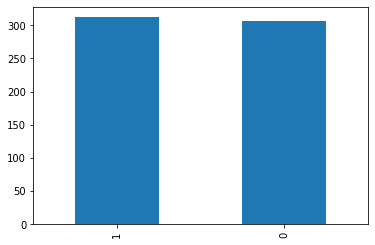

In [ ]:
import matplotlib.pyplot as plt
df['category'].value_counts().plot.bar()

Видим, что мы имеем сбалансированный датасет с равным количеством данных по классам - для изображений листьев подорожника (Goose_grass) - 1, для листьев березы (Birch) - 0. Это особенно важно для небольшого датасета, как в нашем случае, чтобы нейронная сеть равномерно обучилась на всех данных.

#Определение параметров входных изображений

Нейронные сети работают с данными, представленными в виде чисел. Изображение можно представить как набор пикселей с номером цвета в палитре от 0 до 255.

Все изображения нашего датасета имеют разный размер, поэтому нам необходимо привести их к единому формату. Определим ширину и высоту изображений в переменные IMAGE_WIDTH и IMAGE_HEIGHT, соответственно. Формат изображения запишем в переменную IMAGE_SIZE. Кроме формата, каждое изображение имеет еще одно измерение - это цвет, которое называется каналом цвета. Наши изображения являются цветными, поэтому оно будет представлено тремя цветовыми каналами RGB - Red-Green-Blue, соответственно параметр канала цвета равен трем: IMAGE_CHANNELS=3.

Данные для нейронной сети имеет особую структуру. Они представлены в виде тензоров. Тензор можно представить как контейнер для данных с произвольным количеством осей или измерений, в которых размещаются  данные.  Изображения подаются в виде четырехмерных тензоров с формой (количество образцов, высота, ширина, количество каналов цвета).

In [ ]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

#Построение модели нейронной сети

Для построения модели нейронной сети применяем библиотеку Keras, которая входит в состав фреймворка Tensorflow.

Лучшим подходом для обработки изображений считается применение сверточных нейронных сетей как разновидности моделей глубокого обучения.Как отмечает разработчик Keras Франсуа Шолле, создание моделей глубокого обучения стало подобно конструктору LEGO, где важно эффективно собрать совместимые слои в конвейер для обработки данных. Библиотека Keras является достаточно простой в применении и на ее основе уже создано большое количество готовых моделей, которые позволяют использовать нейронные сети для решения практических задач.

Для решения нашей задачи используем модель сверточной нейронной сети, представленной на платформе Kaggle в соревновании «Dogs vs. Cats» как шаблона для решения задачи по классификации наших изображений.

Основным блоком в нейронной сети является слой, который принимает и обрабатыает данные. Мы используем класс Sequential, чтобы создать многослойную модель нейронной сети последовательного типа.

Для создания слоев применим следующие модули:

- Conv2D - для создания сверточных слоев;
- BatchNormalization - для создания слоя пакетной нормализации, как метода ускорения и повышения стабильности нейронных сетей, предложенного  С. Иоффе и К. Сегеди в 2015 году;
- MaxPooling2D - для создания слоя подвыборки, снижающего пространственную размерность данных;
- Dropout - метод регуляризации, который позволяет случайным образом исключить некоторые нейроны из обучения с указанной вероятностью;
- Dense -  для создания полносвязных слоев;
- Flatten - для создания переходного слоя от Conv2D к Dense;

В модели нейронной сети выходное значение нейрона определяется функцией активации. Мы используем функцию активации Relu во всех слоях, кроме последнего. На последнем слое - функция активации - softmax, которая позволяет определить вероятность принадлежности конкретного изображения к одному из классов.



Итак, загружаем необходимые модули для построения модели нейронной сети.

In [ ]:
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.python.keras import Sequential

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

Обратите внимание, используя эту архитектуру нейронной сети мы получаем 12 941 314 параметров для обучения.

#Подготовка обучающей и проверочной выборок

Мы используем ImageDataGenerator и метод flow_from_dataframe, чтобы подавать данные в нейронную сеть во время ее обучения. Параметр class_mode='categorical' отвечает за класс каждого изображения, который нужно научить предсказывать нейронную сеть.
При использовании этого аргумента, все значения в столбце датафрейма 'category' должны иметь строковый тип, поэтому выполним замену меток со значением 0 на 'Birch', а 1 - на 'Goose_grass', используя метод replace.

In [ ]:
df['category'] = df['category'].replace({0: 'Birch', 1: 'Goose_grass'})

In [ ]:
from sklearn.model_selection import train_test_split
# Создание обучающей и проверочной выборок
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=21)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

Посмотрим на распределение изображений в обучающей выборке train_df.

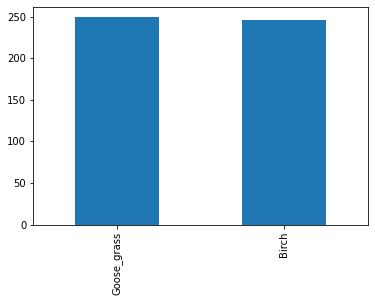

In [ ]:
train_df['category'].value_counts().plot.bar()

Посмотрим на распределение изображений в проверочной выборке validate_df.

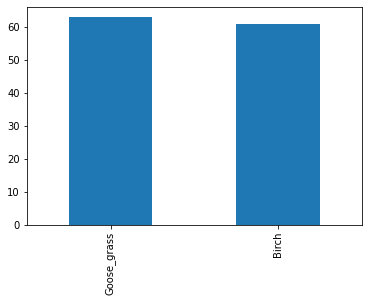

In [ ]:
validate_df['category'].value_counts().plot.bar()

Запишем количество данных полученных датафреймов в переменные total_train и total_validate, используя атрибут .shape. Атрибут .shape возвращает кортеж из количества строк и столбцов датафрейма. Соответственно, shape[0] вернет нам количество строк в каждом из датафреймов.

Данные в нейронную сеть мы будем подавать так называемыми мини-пакетами, размер которых определим в параметре batch_size.

In [ ]:
# обучающие и проверочные данные
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
# batch_size
batch_size=15

Посмотрим на количество данных в обучающей и проверочной выборках.

In [ ]:
print("Количество данных для обучения:", total_train)
print("Количество данных для оценки точности модели нейронной сети во время обучения:", total_validate)

Количество данных для обучения: 495
Количество данных для оценки точности модели нейронной сети во время обучения: 124


#Callbacks

Процесс обучения нейронной сети можно регулировать, используя модуль tensorflow.python.keras.callbacks, который включает в себя так называемые встроенные обратные вызовы. Мы будем использовать следующие обратные вызовы:
- EarlyStopping - чтобы остановить процесс обучение, если точность обучения на проверочной выборке не будет улучшаться в течение 5 эпох обучения (patience=5);
- ReduceLROnPlateau - чтобы регулировать скорость обучения, если точность обучения  на проверочной выборке не будет улучшаться в течение 2 эпох обучения (patience=2);
- ModelCheckpoint - будем сохранять лучшую модель в ходе обучения, ориентируясь на 'val_accuracy'.

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=2,
                                            factor=0.5,
                                            min_lr=0.00001)
modelCheckpoint = ModelCheckpoint("model-cnn.h5",
                                  monitor='val_accuracy',
                                  verbose=2,
                                  save_best_only=True)


Сохраним обозначенные обратные вызовы в список callbacks, чтобы впоследствии передать их как аргумент метода fit для обучения модели.

In [ ]:
callbacks = [earlystop, learning_rate_reduction, modelCheckpoint]

#ImageDataGenerator для обучающих и проверочных данных

Итак, мы уже говорили, что используем ImageDataGenerator и метод flow_from_dataframe, чтобы подавать данные в нейронную сеть во время ее обучения. Класс ImageDataGenerator автоматически преобразовывает файлы с изображениями в данные в форме тензоров, которые ожидает получить нейронная сеть.

Кроме того, пиксели исходных изображений необходимо преобразовать из диапазона [0, 255] в диапазон [0, 1]. Это называется нормализацией входных данных и выполняется с помощью параметра для масштабирования значений пикселей изображения rescale=1./255.

Также применим небольшие случайные преобразования к изображениям, что позволит нам расширить данные во время обучения за счет того, модель не увидит одно и то же изображение дважды. Этот прием позволяет создать дополнительные обучающие данные из имеющихся изображений путем их трансформации. Параметры для трансформации изображений мы уже обсуждали в разделе "Аугментация данных".

Аргументами для метода flow_from_dataframe  в случае обучающей выборки являются:
- train_df - датафрейм с данными для обучения;
- "/content/Data/" - путь к директории с данными;
- x_col='filename' - данные датафрейма с файлами;
- y_col='category' - данные датафрейма с метками;
- target_size=IMAGE_SIZE - параметры изображения;
- class_mode ='categorical' - связан с параметром y_col для определения класса изображения;
- batch_size - размер мини-пакета данных для подачи в нейронную сеть для обучения.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.01,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 495 validated image filenames belonging to 2 classes.


Видим, что в обучающей выборке имеется 495 изображений, принадлежащих к двум классам.

Аналогичные действия выполним для проверочной выборки.

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.01,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 124 validated image filenames belonging to 2 classes.


Видим, что в проверочной выборке сейчас имеется 124 изображения, принадлежащих к двум классам.

Посмотрим как работает ImageDataGenerator на обучающей выборке. Выберем для этого три изображения и визуализируем их с помощью инструментов библиотеки matplotlib.

In [ ]:
example_df = train_df.sample(n=3).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 3 validated image filenames belonging to 2 classes.


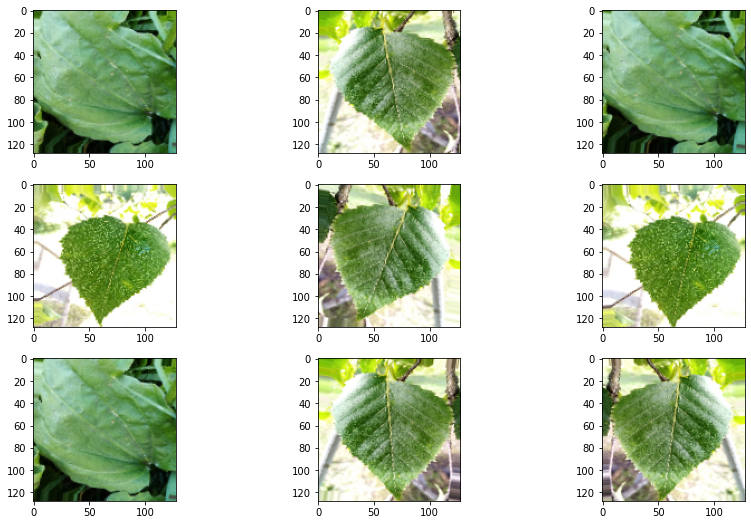

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#Обучение модели

Для обучения модели нейронной сети мы используем метод fit из библиотеки
Keras. Исходные данные для передачи в модель мы уже подготовили ранее с помощью генератора ImageDataGenerator (см. раздел "ImageDataGenerator для обучающих и проверочных данных").

Итак, в качестве параметров в метод fit мы передаем:
- train_generator - обучающая выборка;
- epochs - количество итераций, которое будет выполнено по всем обучающим данным;
- validation_data=validation_generator - проверочная выборка;
- validation_steps=total_validate//batch_size - количество пакетов данных, извлекаемых из генератора проверочных данных определяемое как общее количество проверочных данных деленное (целочисленно) на размер batch_size;
- steps_per_epoch=total_train//batch_size - количество шагов за одну эпоху, исходя из общего количества данных обучающей выборки и размера мини-пакета batch_size;
- callbacks - список callbacks для управления процессом обучения и сохранения лучшего результата модели.

Контроль обучения модели нейронной сети происходит при помощи следующих параметров:
- 'loss' - функция потерь на обучающей выборке;
- 'val_loss'- функция потерь на проверочной выборке;
- 'accuracy' - точность модели на обучающей выборке;
- 'val_accuracy' - точность модели на проверочной выборке;
- 'lr' - скорость обучения (аргумент оптимизатора).

Все эти параметры записываются в процессе обучения модели в объект history, который возвращается при вызове model.fit.

В ходе обучения вы можете видеть, что отображается номер эпохи.
Мы можем видеть как меняются значения 'loss', 'val_loss', 'accuracy' и
'val_accuracy'.

Видим, как работают заданные нами функции обратного вызова callbacks, а именно:
- запись лучшего результата отслеживается по значению 'val_accuracy', например, "val_accuracy improved from 0.79167 to 0.95833, saving model to model-cnn.h5";
- уменьшается скорость обучения, если не улучшается значение 'val_accuracy' в течение двух эпох: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.




In [ ]:
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)

Epoch 1/30
33/33 [==============================] - ETA: 0s - loss: 4.5592e-05 - accuracy: 1.0000
Epoch 00001: val_accuracy improved from 0.61667 to 0.79167, saving model to model-cnn.h5
33/33 [==============================] - 109s 3s/step - loss: 4.5592e-05 - accuracy: 1.0000 - val_loss: 0.5913 - val_accuracy: 0.7917
Epoch 2/30
33/33 [==============================] - ETA: 0s - loss: 8.6962e-05 - accuracy: 1.0000
Epoch 00002: val_accuracy improved from 0.79167 to 0.95833, saving model to model-cnn.h5
33/33 [==============================] - 105s 3s/step - loss: 8.6962e-05 - accuracy: 1.0000 - val_loss: 0.0825 - val_accuracy: 0.9583
Epoch 3/30
33/33 [==============================] - ETA: 0s - loss: 9.1536e-04 - accuracy: 1.0000
Epoch 00003: val_accuracy improved from 0.95833 to 0.97500, saving model to model-cnn.h5
33/33 [==============================] - 105s 3s/step - loss: 9.1536e-04 - accuracy: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9750
Epoch 4/30
33/33 [===================

Обратите внимание, на значение 'val_accuracy' после завершения обучения модели. Если 'val_accuracy' ниже 90% (0.9), запустите обучение повторно.

Итак, мы реализовали процесс обучения нейронной сети с учителем, используя библиотеку Keras.
Вспомним основные этапы:
1. Мы создали обучающий датасет и определили для него целевые метки (класс изображения).
2. Мы подготовили данные для обучения с использованием ImageDataGenerator в форме тензоров, которые ожидает получить нейронная сеть.
3. Мы построили модель для обучения нейронной сети.
4. Мы настроили процесс обучения через выбор функции потерь, оптимизатора, метрики, параметров для мониторинга и функций обратного вызова (callbacks).
5. Мы реализовали итерации по обучающим данным через вызов метода fit() модели.

Загрузим файл "model-cnn.h5" с лучшим результатом обученной модели в Colaboratory.

In [ ]:
model.load_weights("model-cnn.h5")

Здесь мы можем посмотреть на параметры модели, о которых упоминали ранее.

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Посмотрим на все значения, которые принимала метрика 'accuracy' во время обучения.

In [ ]:
history.history['accuracy']

[1.0,
 1.0,
 1.0,
 0.9979798197746277,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9959595799446106,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Найдем максимальное значение 'accuracy'.

In [ ]:
max(history.history['accuracy'])

1.0

Посмотрим на все значения, которые принимала метрика 'val_accuracy' во время обучения.

In [ ]:
history.history['val_accuracy']

[0.7916666865348816,
 0.9583333134651184,
 0.9750000238418579,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Найдем максимальное значение 'val_accuracy'.

In [ ]:
max(history.history['val_accuracy'])

1.0

Видим, что значения метрик 'val_accuracy' и  'accuracy' равны 1. Т.е. мы можем предположить, что обучаемая нами модель научилась безошибочно распознавать изображения.
Но еще рано делать выводы, давайте визуализируем процесс обучения при помощи инструментов библиотеки matplotlib.

Построим графики для функции потерь и точности на обучающей и проверочной выборках.  

#Визуализация обучения

In [ ]:
import numpy as np

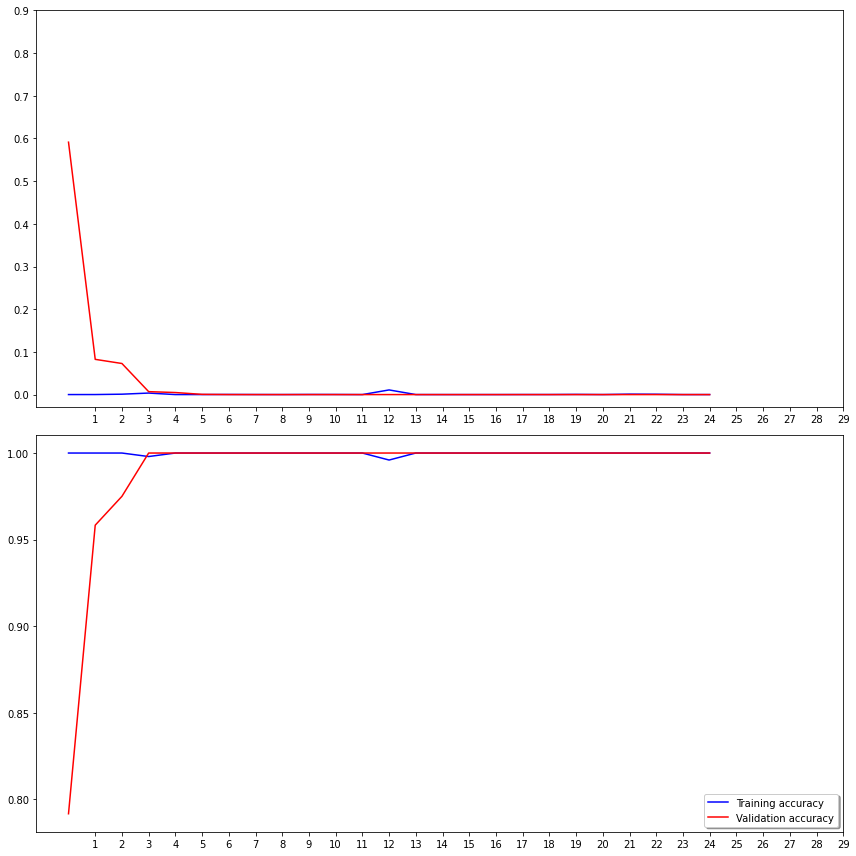

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Видим, что на определенном этапе точность на проверочной выборке стала выше, чем на обучающей. Это может говорить о переобучении модели, когда она модель теряет способность к обобщению.

Так же можно сделать вывод о количестве эпох для обучения, их можно сделать меньше и попробовать обучить еще раз.

Чтобы проверить как обучилась наша нейронная сеть, покажем ей данные, которые она никогда не видела - тестовый набор, который мы подготовили ранее.

#Подготовка тестовых данных

Загрузим архив с тестовыми данными с Google-диска, используя команду !cp, указав путь к имени файла в кавычках (или апострофах)  и имя самого файла Test.zip.

In [ ]:
# загрузка файла с  Google-диска
!cp '/content/drive/My Drive/Сахалин_Родник/Учебное_пособие_Классификация_изображений/Датасеты/Test.zip' Test.zip

Распакуем архив Test.zip с помощью команды !unzip.

In [ ]:
# распаковка архива
!unzip Test.zip

Archive:  Test.zip
  inflating: Test/IMG_20200813_175309.jpg  
  inflating: Test/IMG_20200813_175718.jpg  
  inflating: Test/IMG_20200813_175741.jpg  
  inflating: Test/IMG_20200813_175753.jpg  
  inflating: Test/IMG_20200813_175803.jpg  
  inflating: Test/IMG_20200813_175951.jpg  
  inflating: Test/IMG_20200813_180108.jpg  
  inflating: Test/IMG_20200813_180216.jpg  
  inflating: Test/IMG_20200813_180254.jpg  
  inflating: Test/IMG_20200813_180355.jpg  


Видим, что все файлы находятся в директории Test.

Посмотрим на списоск файлов и директорий, которые сейчас есть в Colaboratory.

In [ ]:
!ls

archive_aug_Data.zip  model-cnn.h5  Test.zip	Подорожник
Data		      sample_data   Береза	Подорожник.zip
drive		      Test	    Береза.zip


Сформируем список test_filenames тестовых файлов из директории Test, которая находится в Colaboratory с помощью метода  listdir модуля os.

In [ ]:
test_filenames = os.listdir('/content/Test')

Посмотрим на содержание списка test_filenames.

In [ ]:
test_filenames

['IMG_20200813_175753.jpg',
 'IMG_20200813_175309.jpg',
 'IMG_20200813_180355.jpg',
 'IMG_20200813_175951.jpg',
 'IMG_20200813_180254.jpg',
 'IMG_20200813_175741.jpg',
 'IMG_20200813_175718.jpg',
 'IMG_20200813_180108.jpg',
 'IMG_20200813_180216.jpg',
 'IMG_20200813_175803.jpg']

Посчитаем количество файлов в директории Test.

In [ ]:
# подсчет количества файлов в директории
!find /content/Test -type f| wc -l

10


Видим, что для тестирования обученной модели нейронной сети у нас есть 10 файлов.

Поместим эти тестовые файлы в датафрейм Pandas, как мы уже делали это для обучающего набора данных ранее. Но в этом случае, мы делаем разметку данных, так как ожидаем предсказание от обученной нами модели нейронной сети.

Датафрейм test_df имеет только одну колонку 'filename' с файлами для тестирования.



In [ ]:
test_df = pd.DataFrame({
    'filename': test_filenames
})

Количество тестовых файлов запишем в переменную 'nb_samples'.

In [ ]:
nb_samples = test_df.shape[0]

Посмотрим на первые пять строк содержимого датафрейма test_df.

In [ ]:
test_df.head()

,filename
0,IMG_20200813_175753.jpg
1,IMG_20200813_175309.jpg
2,IMG_20200813_180355.jpg
3,IMG_20200813_175951.jpg
4,IMG_20200813_180254.jpg


Подготовим данные для тестирования модели с помощью ImageDataGenerator и метода flow_from_dataframe, аналогично как мы делали это для обучающей и проверочной выборок.

Но в случае тестовых данных мы не будем их трансформировать и перемешивать (shuffle=False), а только масштабируем их с помощью параметра rescale=1./255.
Обратите внимание, что y_col=None и class_mode=None не определены, так как тестовые данные не имеют меток, которые определяют их класс.

Так как тестовых данных у нас всего 10 файлов, мы не будем разбивать их на мини-пакеты, а подадим их все сразу, задав параметр batch_size=10.


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/Test/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=10,
    shuffle=False
)

Found 10 validated image filenames.


Итак, у нас в наличии 10 файлов с изображениями.

Применим метод predict, чтобы предсказать класс для каждого изображения. Параметрами метода являются:
- данные test_generator, сформированные нами ранее с помощью ImageDataGenerator и метода flow_from_dataframe;
- steps - количество итераций для прогноза результатов, определяемых как общее количество тестовых данных nb_samples деленное на размер мини-пакета  batch_size. В нашем случае это будет одна итерация, так как размер мини-пакета мы определили равным общему количеству тестовых файлов. Функция ceil библиотеки numpy возвращает наименьшее целое для числа итераций.



In [ ]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

Метод predict возвращает значения прогнозируемых меток (классов) в виде массива numpy.
Посмотрим на форму массива, используя метод shape.




In [ ]:
predict.shape

(10, 2)

Видим, что массив представлен в виде матрицы, в которой 10 строк и 2 столбца, что соответствует 10 тестовым файлам и двум значениям вероятности принадлежности изображения к одному из двух классов, предсказанных моделью нейронной сети.

Первый столбец имеет индекс [0], соответственно в нем находится вероятность предсказания класса с меткой = 0.

Второй столбец имеет индекс [1], соответственно в нем находится вероятность предсказания класса с меткой = 1.

Мы имеем два значения вероятности, так как решаем задачу классификации изображений для двух классов.

Посмотрим на значения предсказанных данных.

In [ ]:
predict

array([[9.9980301e-01, 1.9698901e-04],
       [1.0000000e+00, 2.7925317e-08],
       [9.9857962e-01, 1.4204185e-03],
       [1.4110673e-06, 9.9999857e-01],
       [1.0107638e-18, 1.0000000e+00],
       [1.0000000e+00, 1.2589640e-08],
       [9.9999833e-01, 1.7168450e-06],
       [2.9206314e-04, 9.9970788e-01],
       [3.2444983e-03, 9.9675554e-01],
       [9.9979800e-01, 2.0202040e-04]], dtype=float32)

Итак, мы видим, что предсказанные значения для тестовых данных представлены в виде массива данных - матрицы, где в каждой строке представлены вероятности предсказания  классов для соответствующего тестового изображения.

Вспомним, что вероятность для класса с меткой 0 (Birch - Береза, label=0) - это первая позиция элемента в строке массива, что соответствует столбцу с индексом позиции = 0.

Вероятность для класса с меткой 1 (Goose_grass - Подорожник, label=1) - это вторая позиция элемента в строке массива, , что соответствует столбцу с индексом позиции = 1.

Там где находится максимальное значение вероятности и соответствует предсказанию класса для каждого изображения согласно индексу позиции соответствующего значения вероятности.

Давайте проанализируем значения вероятности для первой строки массива:

[9.9980301e-01, 1.9698901e-04].

Видим, что максимальное значение вероятности (9.9980301e-01) находится в позиции с индексом = 0. Следовательно делаем вывод, что модель нейронной сети предсказывает это изображение, как принадлежащее к классу 0, т.е. к классу - Birch - Береза с label=0.

Аналогичный вывод делаем для 2-й, 3-й и 4-й строк - модель предсказывает, что на изображениях листья березы - класс 0.

А вот уже в 5-й строке [1.0107638e-18, 1.0000000e+00], мы видим, что максимальное значение вероятности находится в позиции с индексом [1], т.е. модель здесь предсказывает класс изображения = 1, что соотвествует листьям подорожника.

Применим функцию argmax библиотеки Numpy, чтобы извлечь максимальное значение вероятности, предсказанное для каждого изображения (по строкам - axis=1).

In [ ]:
test_df['category'] = np.argmax(predict, axis=1)

Конвертируем предсказанные метки в названия классов для удобной визуализации предсказаний, сделанной моделью нейронной сети.

Для этого предварительно применим метод class_indices к обучающей выборке train_generator, созданной нами ранее, который позволяет получить доступ к словарю, где приведены в соответствие имя класса и соответствующий ему индекс.

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 0: 'Birch', 1: 'Goose_grass'})

#Визулизация предсказанных классов изображений

Посчитаем количество предсказаний по каждому классу и визуализируем их с помощью инструментов библиотеки matplotlib.

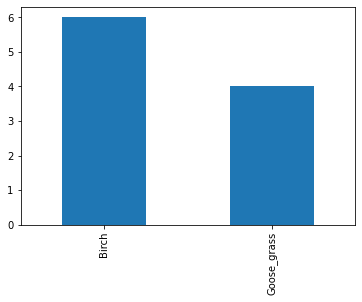

In [ ]:
test_df['category'].value_counts().plot.bar()

Видим, что модель предсказала класс с листьями березы для 6 изображений, а класс с листьями подорожника - для 4 изображений.

Таким образом, точность предсказания составляет 90%. Значит модель ошибочно приняла изображение с листьями подорожника за изображение с листьми березы.

Давайте посмотрим на изображения и сделанные к ним предсказания.


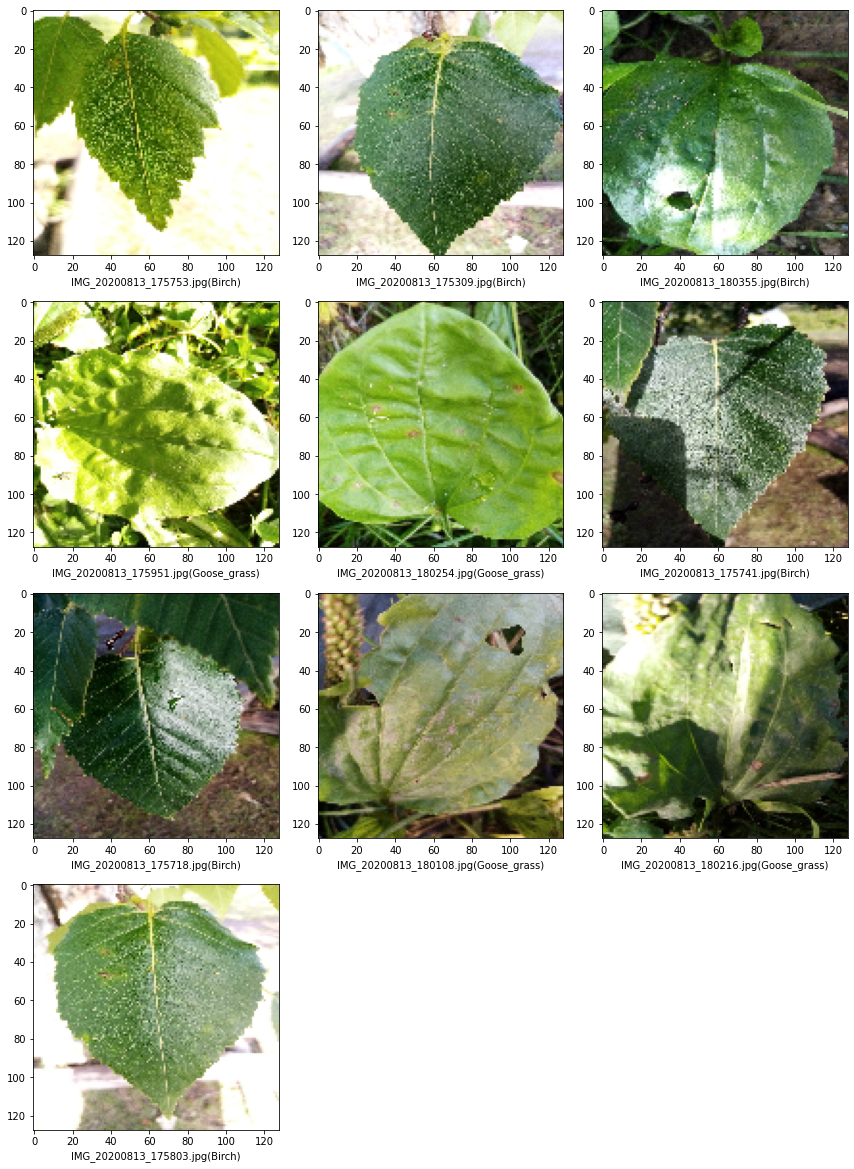

In [ ]:
sample_test = test_df.head(10)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/Test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

Видим, что действительно на третьем изображении - лист подорожника, и он очень похож на лист березы, соответственно модель приняла его за лист березы.

Это ошибочное предсказание связано с одной стороны с небольшим датасетом, который мы использовали для обучения модели нейронной сети, а с другой стороны подчеркивает важность отбора соответствующих изображений для обучения.

Для остальных изображений их класс предсказан верно.


Теперь вы сможете применять применять библиотеку Keras для решения практической задачи классификации изображений.

#Эксперименты с архитектурой нейронной сети


Итак, мы применили готовую модель нейронной сети, которая использовалась для классификации изображений кошек и собак. Однако, для обучения этой модели обучающий набор данных состоял из 25 000 изображений животных. Как вы помните наш обучающий датасет состоял из 495 изображений. Применяемая нами модель сработала для классификации наших изображений, но как вы могли заметить при обучении модели, точность на проверочных данных val_accuracy сначала остановилась на значении около 50% и только после повторного запуска удалось достигнуть 1, т.е. 100%. Однако, на тестовых данных результат классификации составил 90%, т.е. точность на проверочной выборке не подтвердилось.

С чем это может быть связано? Как мы уже отметили, мы обучали модель на небольшом датасете и наблюдали эффект переобучения. Один из способов уменьшить эффект переобучения - это увеличить количество данных. Однако при том же наборе данных избежать переобучение можно за счет уменьшения емкости модели, т.е. количества обучаемых параметров.
Емкость модели или размер модели определяется количеством слоев в архитектуре нейронной сети и количеством фильтров или нейронов в каждом слое, в зависимости от типа слоя - полносязный или сверточный.
Как вы помните в используемой нами архитектуре нейронной сети было 12 941 314 параметров для обучения.

Давайте изменим архитектуру следующим образом:
- оставим только первый блок со сверточных слоем;
- сократим количество полносвязных слоев и оставим только слой для предсказания классов изображений.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(2, activation='softmax')) # 2 класса

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 254018    
Total params: 255,042
Trainable params: 254,978
Non-trainable params: 64
_______________________________________________

Видим, что наша упрощенная модель имеет 254,978 параметра для обучения.

Обучим эту модель нейронной сети на тех же данных в течение 5 эпох (epochs = 5).

Ниже представлен процесс обучения новой модели и график измения метрик.

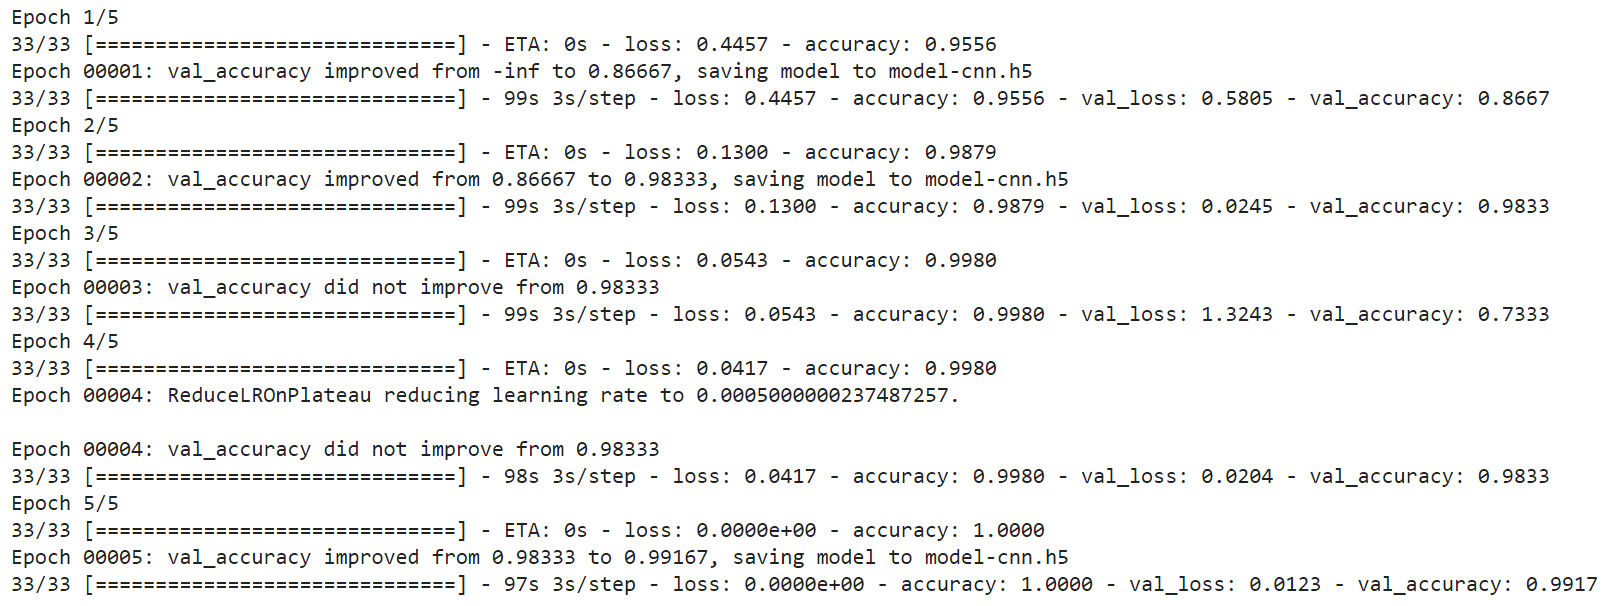

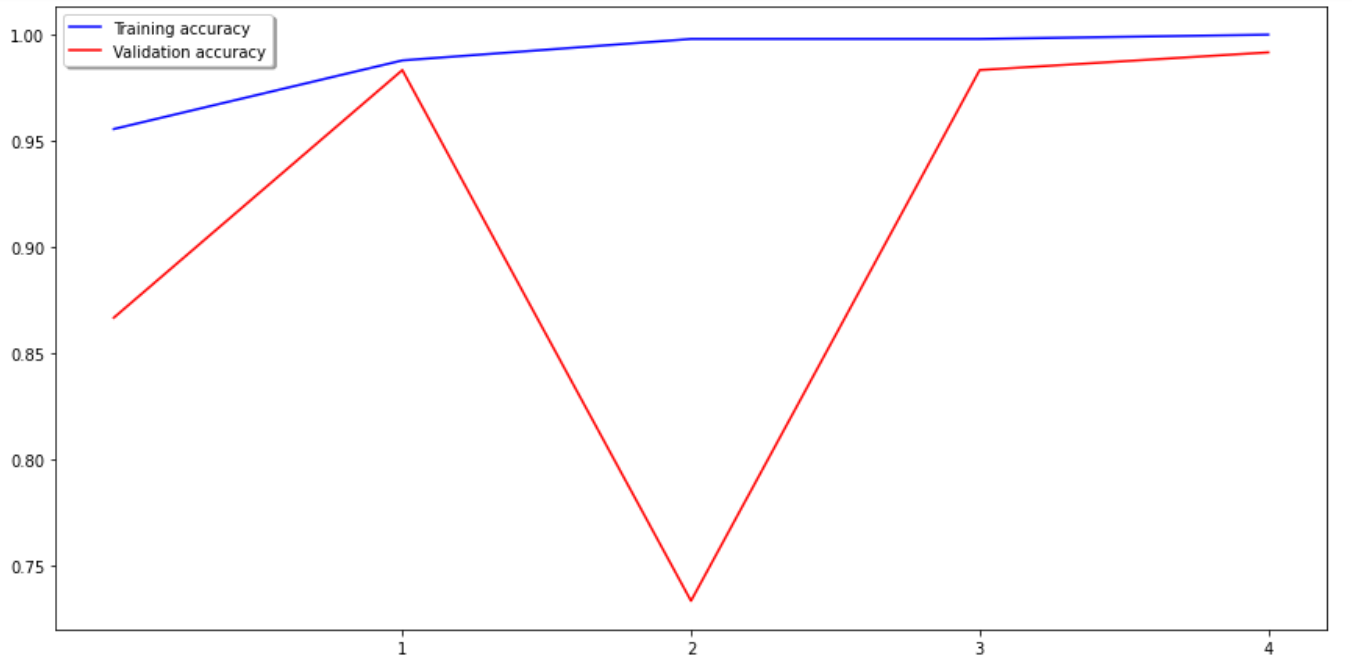

Видим, что точность на обучающей выборке достигла accuracy = 1.0, а на проверочных данных val_accuracy = 0.99. Причем еще сохранилась тенденция к росту для val_accuracy и можно было бы добавить еще 1 или 2 эпохи.

Обучение модели получилось с одного запуска.
Классы изображений для всех тестовых данных были предсказаны со 100%-ой точностью.




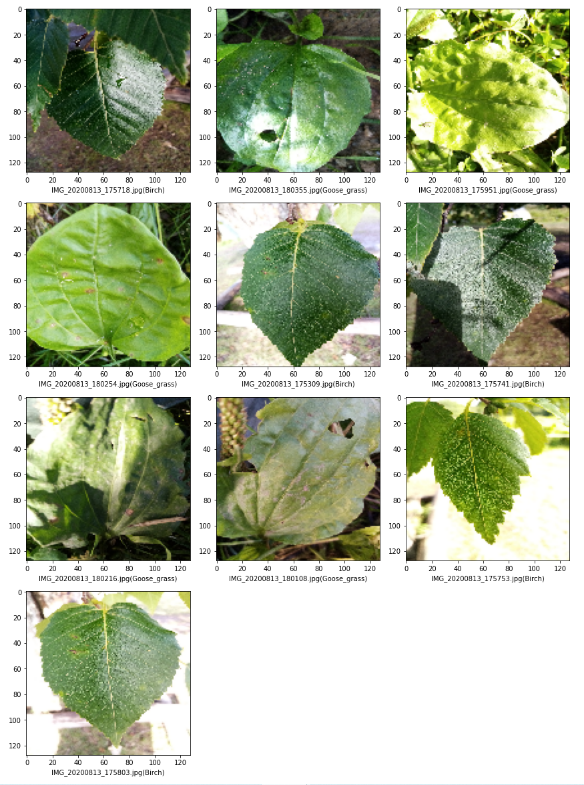

Рис. 18. Предсказания модели нейронной сети (254,978 параметра для обучения).
